# 第2章
## 正規分布による生成モデル
### 身長データセット読み込み

(25000,)


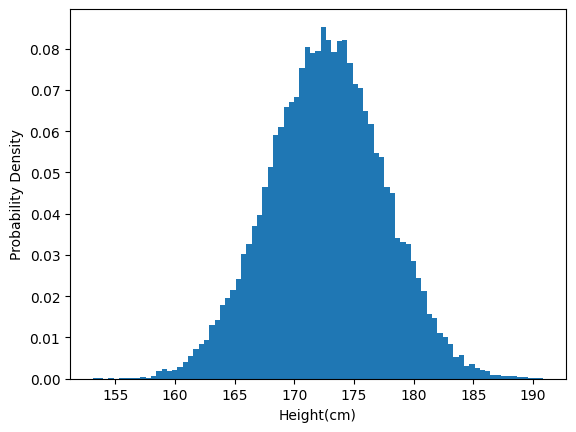

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

path = 'height.txt'
xs = np.loadtxt(path)
print(xs.shape)

plt.hist(xs, bins='auto', density=True)
plt.xlabel('Height(cm)')
plt.ylabel('Probability Density')
plt.show()

## 最尤推定とは
サンプル$\mathcal{D}=\{x^{\left(1\right)}, x^{\left(2\right)}, \cdots, x^{\left(N\right)}\}$が得られた場合を考える。このとき、サンプル$\mathcal{D}$が得られる確率密度は次の式によって表される
$$
\begin{align}
p\left(\mathcal{D};\theta\right)&=p\left(x^{\left(1\right)};\theta\right)p\left(x^{\left(2\right)};\theta\right)\cdots p\left(x^{\left(N\right)};\theta\right)\\
&= \prod_{n=1}^N{p\left(x^{\left(n\right)};\theta\right)}
\end{align}
$$
このとき、$L\left(\theta\right):=p\left(\mathcal{D};\theta\right)$は尤度や尤度関数と呼ばれる。尤度はパラメータ$\theta$に対してサンプルがどれくらい起こり得るかを確率密度で表す。

### 最尤推定によるパラメータ推定
正規分布のおける尤度は、
$$
p\left(\mathcal{D};\mu,\sigma\right) = \prod_{n=1}^{N}{\frac{1}{\sqrt{2\pi}\sigma}\exp\left(-\frac{\left(x^{\left(n\right)}-\mu\right)^2}{2 \sigma^2}\right)}
$$
とかける。
$L\left(\mu, \sigma\right)=\log p\left(\mathcal{D};\mu,\sigma\right)$と定義して計算すると

$$
\begin{align}
\frac{\partial L}{\partial \mu} &= \frac{1}{\sigma^2}\sum_{n=1}^{N}\left(x^{\left(n\right)}-\mu\right)
\\
\frac{\partial}{\partial \sigma}p\left(\mathcal{D};\mu=\hat{\mu},\sigma\right)&=-\frac{N}{\sigma} + \sigma^{-3}\sum_{n=1}^N{\left(x^{\left(n\right)}-\hat{\mu}\right)^2} 
\end{align}
$$

$\frac{\partial L}{\partial \mu}=0, \frac{\partial}{\partial \sigma}p\left(\mathcal{D};\mu=\hat{\mu},\sigma\right)=0$ を計算することで、
$$
\begin{align}
\hat{\mu} &= \frac{1}{N}\sum_{n=1}^N{x^{\left(n\right)}}\\
\hat{\sigma} &= \sqrt{\frac{1}{N}\sum_{n=1}^N\left(x^{\left(n\right)}-\hat{\mu}\right)^2}
\end{align}
$$
- 最尤推定により、正規分布のパラメータはサンプルの平均と標準偏差になる

In [3]:
mu = np.mean(xs)
sigma = np.std(xs)

print(mu)
print(sigma)

172.70250853667997
4.830167473396299


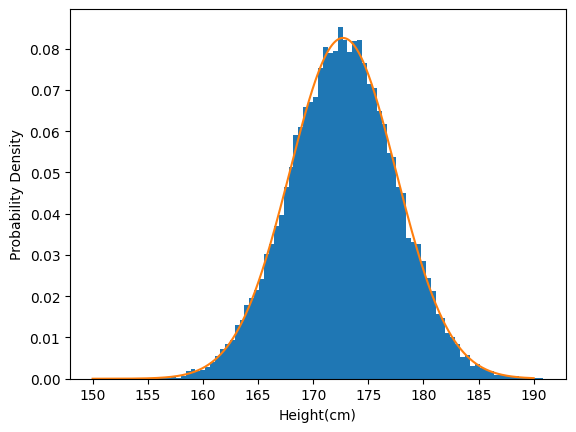

In [4]:
# 正規分布の関数
def normal(x, mu=0, sigma=1):
    y = 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-(x - mu)**2 / (2 * sigma**2))
    return y

x = np.linspace(150, 190, 1000)
y = normal(x, mu, sigma)

# グラフの描画
plt.hist(xs, bins='auto', density=True)
plt.plot(x, y)
plt.xlabel('Height(cm)')
plt.ylabel('Probability Density')
plt.show()

## 生成モデルを利用して新しいデータの作成
- 最尤推定によって求めた生成モデル(正規分布)から新しくデータを作成して比較する

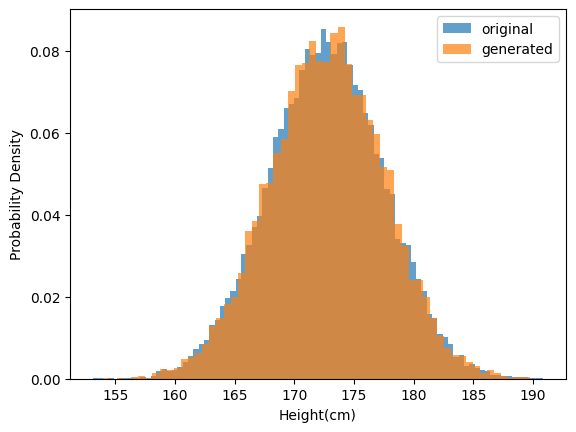

In [5]:
samples = np.random.normal(mu, sigma, 10000) # 平均、分散、個数
plt.hist(xs, bins='auto', density=True, alpha=0.7, label='original')
plt.hist(samples, bins='auto', density=True, alpha=0.7, label='generated')
plt.xlabel('Height(cm)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

## 確率の計算
- scipyを使って正規分布の累積分布関数を求めることができる
- `scipy.stats.norm.cdf(x, loc=0, scale=1)`で平均0,分散1の正規分布において値がx以下となる確率が得られる
$$
\int_{y=-\infty}^{x}{\mathcal{N}\left(y; \mu, \sigma \right)dy}
$$

In [ ]:
from scipy.stats import norm

p1 = norm.cdf(160, mu, sigma)
print('p(x <= 160):', p1)

p2 = norm.cdf(180, mu, sigma)
print('p(x > 180):', 1-p2)